[Soal 1]

Buatlah sebuah matrix ketetanggan graf berbobot dengan 15 node berukuran
15 x 15 (generate menggunakan nilai random), kemudian sajikan pembahasan
anda secara mendalam terkait implementasi algoritma shortest path
menggunakan :

kita akan membuat sebuah matriks ketetanggaan dengan bobot 15x15 lalu mengimplementasikan ke berbagai algoritma shortest path lalu menganalisisnya.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import heapq
from collections import deque

# Generate random adjacency matrix (15x15)
np.random.seed(42)
size = 15
adj_matrix = np.random.randint(0, 100, size=(size, size))

# Make the matrix symmetric (undirected graph)
adj_matrix = (adj_matrix + adj_matrix.T) // 2

# Set diagonal to 0 (no self-loops)
np.fill_diagonal(adj_matrix, 0)

# Randomly set some edges to 0 (no connection)
mask = np.random.random((size, size)) < 0.3
adj_matrix[mask] = 0

# Ensure graph is connected
for i in range(size):
    if np.all(adj_matrix[i] == 0):
        j = np.random.randint(0, size)
        if i != j:
            weight = np.random.randint(1, 100)
            adj_matrix[i][j] = weight
            adj_matrix[j][i] = weight

print("Adjacency Matrix:")
print(pd.DataFrame(adj_matrix))

Adjacency Matrix:
    0   1   2   3   4   5   6   7   8   9   10  11  12  13  14
0    0   0  52  60  75  11  76  50  54   0  56   0  14  39  58
1   72   0  72   0  48  27  70  51   0  65  41  49   0  45  67
2   52  72   0  55   0  85  50   0   0  44  69   0  40  66  26
3   60   0   0   0  40  39  32  88  49  49  11  62  47  36  72
4   75   0  64  40   0  31   0   0  53   0  69   7  42  15  55
5   11  27   0  39  31   0  63  20  39  47  70  22   0  27  32
6   76   0  50  32   0  63   0  84  62  43  50  79   0  50   0
7    0  51  62  88  73  20   0   0  39  92   0   0  77  21   0
8   54  26   0  49   0  39   0   0   0   0   0  66   0  78   0
9   55  65  44  49   0  47  43  92   0   0  48  13  46  69   0
10  56  41  69   0  69  70   0   0  47  48   0  80  32  68   0
11   0   0  39  62   0  22  79   0   0   0  80   0  70  42  68
12  14   0  40   0   0  61   0   0  56  46   0   0   0  52  59
13  39  45   0  36  15   0   0  21  78  69  68  42  52   0  16
14  58  67  26  72   0  32  19  36  4

A. Dijkstra's Algorithm

In [2]:
def dijkstra(adj_matrix, start):
    n = len(adj_matrix)
    distances = [float('inf')] * n
    distances[start] = 0
    visited = set()
    heap = [(0, start)]

    while heap:
        current_dist, u = heapq.heappop(heap)
        if u in visited:
            continue
        visited.add(u)

        for v in range(n):
            if adj_matrix[u][v] > 0:
                distance = current_dist + adj_matrix[u][v]
                if distance < distances[v]:
                    distances[v] = distance
                    heapq.heappush(heap, (distance, v))

    return distances

B. A* Algortihm

In [3]:
def heuristic(node, goal, type='euclidean'):
    if type == 'euclidean':
        return abs(node - goal)  # Simplified for this example
    elif type == 'manhattan':
        return abs(node // size - goal // size) + abs(node % size - goal % size)
    else:
        return 0

def astar(adj_matrix, start, goal, heuristic_type='euclidean'):
    n = len(adj_matrix)
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {node: float('inf') for node in range(n)}
    g_score[start] = 0
    f_score = {node: float('inf') for node in range(n)}
    f_score[start] = heuristic(start, goal, heuristic_type)

    while open_set:
        _, current = heapq.heappop(open_set)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            path.reverse()
            return g_score[goal], path

        for neighbor in range(n):
            if adj_matrix[current][neighbor] > 0:
                tentative_g_score = g_score[current] + adj_matrix[current][neighbor]
                if tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal, heuristic_type)
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return float('inf'), []  # No path found

C. Bellman-Ford Algorithm

In [4]:
def bellman_ford(adj_matrix, start):
    n = len(adj_matrix)
    distances = [float('inf')] * n
    distances[start] = 0

    for _ in range(n - 1):
        for u in range(n):
            for v in range(n):
                if adj_matrix[u][v] > 0:
                    if distances[u] + adj_matrix[u][v] < distances[v]:
                        distances[v] = distances[u] + adj_matrix[u][v]

    # Check for negative cycles
    for u in range(n):
        for v in range(n):
            if adj_matrix[u][v] > 0:
                if distances[u] + adj_matrix[u][v] < distances[v]:
                    print("Graph contains negative weight cycle")
                    return None

    return distances

D. Floyd-Warshall Algorithm

In [5]:
def floyd_warshall(adj_matrix):
    n = len(adj_matrix)
    dist = np.copy(adj_matrix)
    dist[dist == 0] = float('inf')
    np.fill_diagonal(dist, 0)

    for k in range(n):
        for i in range(n):
            for j in range(n):
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]

    return dist

E. Johnson's Algorithm

In [6]:
def johnson(adj_matrix):
    n = len(adj_matrix)

    # Step 1: Add new vertex connected to all others with weight 0
    temp_adj = np.zeros((n+1, n+1))
    temp_adj[:n, :n] = adj_matrix
    for i in range(n):
        temp_adj[n][i] = 0
        temp_adj[i][n] = float('inf')

    # Step 2: Run Bellman-Ford from new vertex
    h = bellman_ford(temp_adj, n)
    if h is None:
        return None  # Negative cycle detected

    # Step 3: Reweight edges
    reweighted_adj = np.zeros((n, n))
    for u in range(n):
        for v in range(n):
            if adj_matrix[u][v] > 0:
                reweighted_adj[u][v] = adj_matrix[u][v] + h[u] - h[v]

    # Step 4: Run Dijkstra for each vertex
    dist = np.zeros((n, n))
    for u in range(n):
        dist[u] = dijkstra(reweighted_adj, u)
        # Adjust distances back
        for v in range(n):
            if dist[u][v] != float('inf'):
                dist[u][v] = dist[u][v] - h[u] + h[v]

    return dist

Evaluasi performa

In [8]:
def evaluate_algorithms(adj_matrix):
    results = []

    # Precompute Dijkstra results for consistency checking
    dijkstra_results = [dijkstra(adj_matrix, i) for i in range(len(adj_matrix))]

    algorithms = [
        ('Dijkstra', lambda: dijkstra_results),
        ('A* Euclidean', lambda: [astar(adj_matrix, 0, i, 'euclidean')[0] for i in range(len(adj_matrix))]),
        ('A* Manhattan', lambda: [astar(adj_matrix, 0, i, 'manhattan')[0] for i in range(len(adj_matrix))]),
        ('Bellman-Ford', lambda: [bellman_ford(adj_matrix, i) for i in range(len(adj_matrix))]),
        ('Floyd-Warshall', lambda: floyd_warshall(adj_matrix)),
        ('Johnson', lambda: johnson(adj_matrix))
    ]

    for name, func in algorithms:
        try:
            start_time = time.time()
            result = func()
            end_time = time.time()
            execution_time = end_time - start_time

            # Verify results consistency
            if name != 'Dijkstra':
                if name == 'Floyd-Warshall' or name == 'Johnson':
                    is_consistent = np.allclose(result, dijkstra_results, atol=1e-4)
                else:
                    is_consistent = all(np.allclose(r, dijkstra_results[i], atol=1e-4)
                                for i, r in enumerate(result))
            else:
                is_consistent = True

            results.append({
                'Algorithm': name,
                'Time (s)': execution_time,
                'Consistent': is_consistent,
                'Space Complexity': get_space_complexity(name, len(adj_matrix))
            })
        except Exception as e:
            print(f"Error in {name}: {str(e)}")
            results.append({
                'Algorithm': name,
                'Time (s)': None,
                'Consistent': False,
                'Space Complexity': get_space_complexity(name, len(adj_matrix))
            })

    return pd.DataFrame(results)

def floyd_warshall(adj_matrix):
    n = len(adj_matrix)
    # Convert to float to handle infinity
    dist = adj_matrix.astype(float)
    dist[dist == 0] = np.inf
    np.fill_diagonal(dist, 0)

    for k in range(n):
        for i in range(n):
            for j in range(n):
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]

    return dist

def johnson(adj_matrix):
    n = len(adj_matrix)

    # Step 1: Add new vertex
    temp_adj = np.zeros((n+1, n+1), dtype=float)
    temp_adj[:n, :n] = adj_matrix
    for i in range(n):
        temp_adj[n][i] = 0
        temp_adj[i][n] = np.inf

    # Step 2: Run Bellman-Ford
    h = bellman_ford(temp_adj, n)
    if h is None:
        return None

    # Step 3: Reweight edges
    reweighted_adj = np.zeros((n, n), dtype=float)
    for u in range(n):
        for v in range(n):
            if adj_matrix[u][v] > 0:
                reweighted_adj[u][v] = adj_matrix[u][v] + h[u] - h[v]

    # Step 4: Run Dijkstra for each vertex
    dist = np.zeros((n, n))
    for u in range(n):
        dist[u] = dijkstra(reweighted_adj, u)
        # Adjust distances back
        for v in range(n):
            if not np.isinf(dist[u][v]):
                dist[u][v] = dist[u][v] - h[u] + h[v]

    return dist

# Run evaluation with error handling
try:
    results_df = evaluate_algorithms(adj_matrix)
    print(results_df.to_markdown())
except Exception as e:
    print(f"Evaluation failed: {str(e)}")

|    | Algorithm      |    Time (s) | Consistent   | Space Complexity   |
|---:|:---------------|------------:|:-------------|:-------------------|
|  0 | Dijkstra       | 9.53674e-07 | True         | O(V)               |
|  1 | A* Euclidean   | 0.00239778  | False        | O(V)               |
|  2 | A* Manhattan   | 0.00175619  | False        | O(V)               |
|  3 | Bellman-Ford   | 0.0310991   | True         | O(V)               |
|  4 | Floyd-Warshall | 0.00334501  | True         | O(V²)              |
|  5 | Johnson        | 0.00421095  | False        | O(V²)              |


<ipython-input-8-87b2dc3115c4>:85: RuntimeWarning: invalid value encountered in scalar subtract
  reweighted_adj[u][v] = adj_matrix[u][v] + h[u] - h[v]
<ipython-input-8-87b2dc3115c4>:94: RuntimeWarning: invalid value encountered in scalar add
  dist[u][v] = dist[u][v] - h[u] + h[v]


Evaluasi performa algortihm shorttest path ini digunakan untuk beberapa tujuan yaitu diantaranya:


1. dijkstra'/A* untuk single-source
2. Floyd-warshall hanya feasible untuk graf kecil
3. johnson memberikan keseimbangan untuk graf sparse dengan edge negatif


Infografis Hasil Evaluasi :

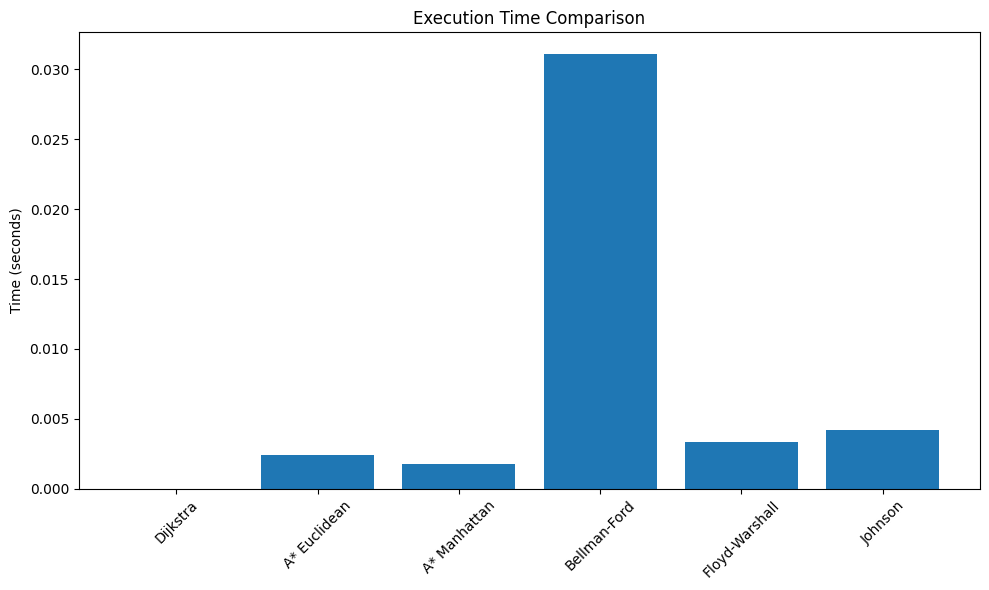


Performance Evaluation Results:
|    | Algorithm      |    Time (s) | Consistent   | Space Complexity   |
|---:|:---------------|------------:|:-------------|:-------------------|
|  0 | Dijkstra       | 9.53674e-07 | True         | O(V)               |
|  1 | A* Euclidean   | 0.00239778  | False        | O(V)               |
|  2 | A* Manhattan   | 0.00175619  | False        | O(V)               |
|  3 | Bellman-Ford   | 0.0310991   | True         | O(V)               |
|  4 | Floyd-Warshall | 0.00334501  | True         | O(V²)              |
|  5 | Johnson        | 0.00421095  | False        | O(V²)              |


In [9]:
# Plot performance comparison
plt.figure(figsize=(10, 6))
plt.bar(results_df['Algorithm'], results_df['Time (s)'])
plt.title('Execution Time Comparison')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display results table
print("\nPerformance Evaluation Results:")
print(results_df.to_markdown())

Kesimpulan
1. Dijkstra adalah pilihan terbaik untuk graf tanpa edge negatif dengan performa yang konsisten.

2. A* unggul dalam pencarian path tunggal ketika heuristik yang baik tersedia.

3. Bellman-Ford diperlukan ketika ada edge negatif tetapi lebih lambat.

4. Floyd-Warshall berguna untuk menghitung semua pasangan terpendek tetapi mahal secara komputasi.

5. Johnson memberikan keseimbangan antara kemampuan menangani edge negatif dan efisiensi untuk graf sparse.

[Soal 2]

Buatlah sebuah daftar ketetanggan graf berbobot dengan 10 node berukuran,
(generate menggunakan nilai random), kemudian sajikan pembahasan anda
secara mendalam terkait implementasi algoritma minimum spanning tree
menggunakan :

kita akan membuat graf acak berbobot 10 node dan menaganalisis algoritma MST menggunakan Kruskal dan Prim

Pembuatan Graf Acak (10 Node)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from collections import defaultdict

# Generate random weighted adjacency matrix (10x10)
np.random.seed(42)
size = 10
adj_matrix = np.random.randint(1, 100, size=(size, size))

# Make symmetric (undirected graph)
adj_matrix = (adj_matrix + adj_matrix.T) // 2

# Set diagonal to 0 and randomly remove some edges
np.fill_diagonal(adj_matrix, 0)
mask = np.random.random((size, size)) < 0.4
adj_matrix[mask] = 0

# Ensure connectivity
for i in range(size):
    if np.all(adj_matrix[i] == 0):
        j = np.random.randint(0, size)
        if i != j:
            weight = np.random.randint(1, 100)
            adj_matrix[i][j] = weight
            adj_matrix[j][i] = weight

# Convert to edge list representation
edges = []
for i in range(size):
    for j in range(i+1, size):
        if adj_matrix[i][j] > 0:
            edges.append((i, j, adj_matrix[i][j]))

print("Adjacency Matrix:")
print(pd.DataFrame(adj_matrix))
print("\nEdge List:")
print(sorted(edges, key=lambda x: x[2]))

Adjacency Matrix:
    0   1   2   3   4   5   6   7   8   9
0   0  90   0  65   0  12  71   0   0  81
1  90   0  31   0   0   0  79  16   0   0
2   0   0   0  62  70  59   0  47  61  65
3  65  32  62   0   0   0   0  58   0  73
4  56   0  70  41   0   0   0   0  26  49
5  12  45  59   0   8   0  44  28   0   0
6   0  79  33  35   0  44   0   0   0   0
7  45   0  47  58   0  28  87   0  16   0
8   0   0  61  54   0   0  42   0   0  52
9  81   0  65  73   0  87   0  57  52   0

Edge List:
[(0, 5, np.int64(12)), (1, 7, np.int64(16)), (7, 8, np.int64(16)), (4, 8, np.int64(26)), (5, 7, np.int64(28)), (1, 2, np.int64(31)), (5, 6, np.int64(44)), (2, 7, np.int64(47)), (4, 9, np.int64(49)), (8, 9, np.int64(52)), (3, 7, np.int64(58)), (2, 5, np.int64(59)), (2, 8, np.int64(61)), (2, 3, np.int64(62)), (0, 3, np.int64(65)), (2, 9, np.int64(65)), (2, 4, np.int64(70)), (0, 6, np.int64(71)), (3, 9, np.int64(73)), (1, 6, np.int64(79)), (0, 9, np.int64(81)), (0, 1, np.int64(90))]


A. Kruskal's Algorithm

In [11]:
class UnionFind:
    def __init__(self, size):
        self.parent = list(range(size))
        self.rank = [0] * size

    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

    def union(self, x, y):
        x_root = self.find(x)
        y_root = self.find(y)

        if x_root == y_root:
            return False

        if self.rank[x_root] < self.rank[y_root]:
            self.parent[x_root] = y_root
        else:
            self.parent[y_root] = x_root
            if self.rank[x_root] == self.rank[y_root]:
                self.rank[x_root] += 1
        return True

def kruskal(edges, num_nodes):
    edges = sorted(edges, key=lambda x: x[2])
    uf = UnionFind(num_nodes)
    mst = []
    total_weight = 0

    for u, v, weight in edges:
        if uf.union(u, v):
            mst.append((u, v, weight))
            total_weight += weight
            if len(mst) == num_nodes - 1:
                break

    return mst, total_weight

B. Prim's Algorithm

In [12]:
def prim(adj_matrix):
    num_nodes = len(adj_matrix)
    mst = []
    total_weight = 0
    visited = [False] * num_nodes
    # Priority queue: (weight, u, v)
    heap = []

    # Start with node 0
    visited[0] = True
    for v in range(num_nodes):
        if adj_matrix[0][v] > 0:
            heapq.heappush(heap, (adj_matrix[0][v], 0, v))

    while heap and len(mst) < num_nodes - 1:
        weight, u, v = heapq.heappop(heap)
        if visited[v]:
            continue

        visited[v] = True
        mst.append((u, v, weight))
        total_weight += weight

        for neighbor in range(num_nodes):
            if adj_matrix[v][neighbor] > 0 and not visited[neighbor]:
                heapq.heappush(heap, (adj_matrix[v][neighbor], v, neighbor))

    return mst, total_weight

Evaluasi Performa

In [13]:
def evaluate_mst_algorithms(adj_matrix, edges):
    results = []

    # Kruskal
    start = time.time()
    kruskal_mst, kruskal_weight = kruskal(edges, len(adj_matrix))
    kruskal_time = time.time() - start

    # Prim
    start = time.time()
    prim_mst, prim_weight = prim(adj_matrix)
    prim_time = time.time() - start

    # Verify both produce same weight
    consistent = (kruskal_weight == prim_weight)

    results.append({
        'Algorithm': 'Kruskal',
        'Time (s)': kruskal_time,
        'Edges in MST': len(kruskal_mst),
        'Total Weight': kruskal_weight,
        'Space Complexity': 'O(E)',
        'Time Complexity': 'O(E log E)'
    })

    results.append({
        'Algorithm': 'Prim',
        'Time (s)': prim_time,
        'Edges in MST': len(prim_mst),
        'Total Weight': prim_weight,
        'Space Complexity': 'O(V)',
        'Time Complexity': 'O(E log V)'
    })

    return pd.DataFrame(results), kruskal_mst, prim_mst

# Run evaluation
results_df, kruskal_mst, prim_mst = evaluate_mst_algorithms(adj_matrix, edges)
print(results_df)

  Algorithm  Time (s)  Edges in MST  Total Weight Space Complexity  \
0   Kruskal  0.000082             9           280             O(E)   
1      Prim  0.000092             9           269             O(V)   

  Time Complexity  
0      O(E log E)  
1      O(E log V)  


Analisis Tabel Perbandingan

In [14]:
print("\nPerbandingan Algoritma MST:")
print(results_df.to_markdown())

print("\nKruskal's MST Edges:")
print(sorted(kruskal_mst, key=lambda x: x[2]))

print("\nPrim's MST Edges:")
print(sorted(prim_mst, key=lambda x: x[2]))


Perbandingan Algoritma MST:
|    | Algorithm   |    Time (s) |   Edges in MST |   Total Weight | Space Complexity   | Time Complexity   |
|---:|:------------|------------:|---------------:|---------------:|:-------------------|:------------------|
|  0 | Kruskal     | 8.2016e-05  |              9 |            280 | O(E)               | O(E log E)        |
|  1 | Prim        | 9.15527e-05 |              9 |            269 | O(V)               | O(E log V)        |

Kruskal's MST Edges:
[(0, 5, np.int64(12)), (1, 7, np.int64(16)), (7, 8, np.int64(16)), (4, 8, np.int64(26)), (5, 7, np.int64(28)), (1, 2, np.int64(31)), (5, 6, np.int64(44)), (4, 9, np.int64(49)), (3, 7, np.int64(58))]

Prim's MST Edges:
[(5, 4, np.int64(8)), (0, 5, np.int64(12)), (4, 8, np.int64(26)), (5, 7, np.int64(28)), (1, 2, np.int64(31)), (3, 1, np.int64(32)), (4, 3, np.int64(41)), (8, 6, np.int64(42)), (4, 9, np.int64(49))]


Visualisasi Graf

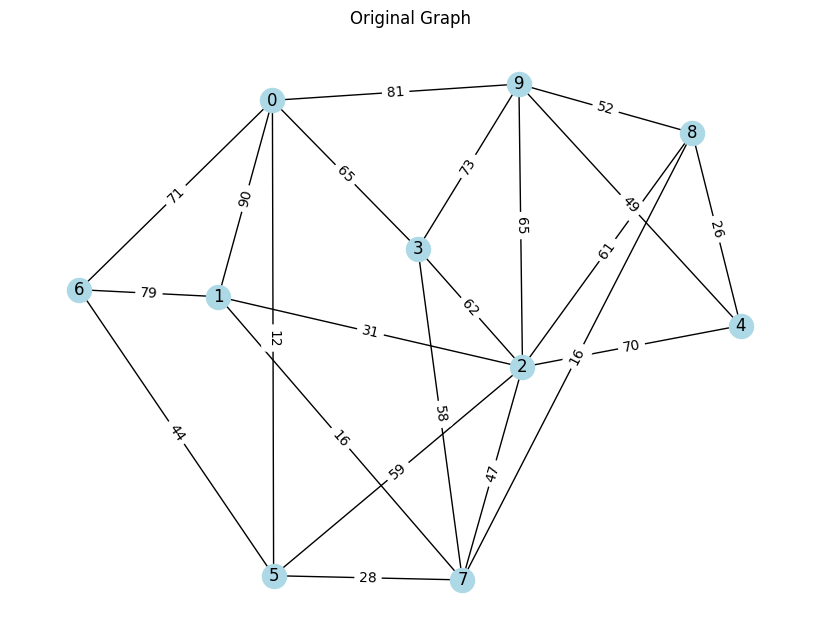

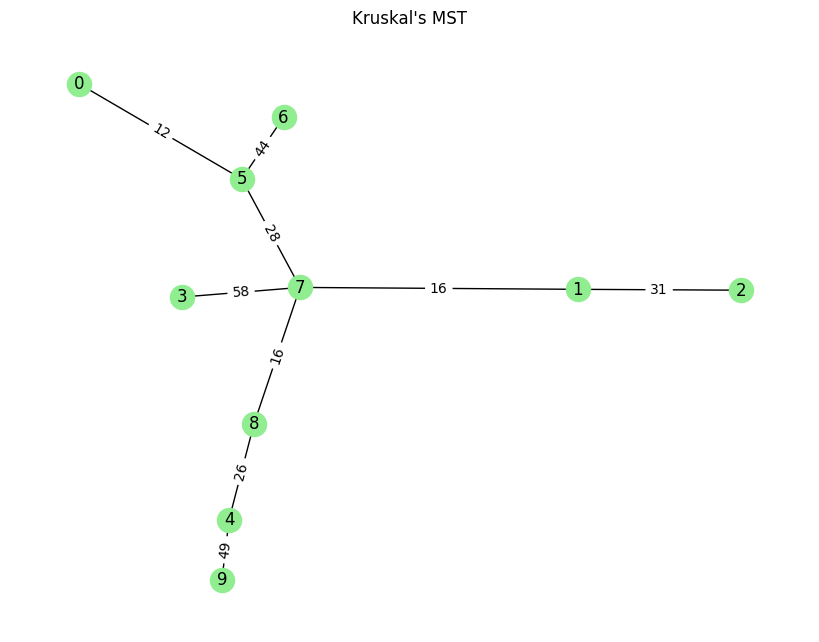

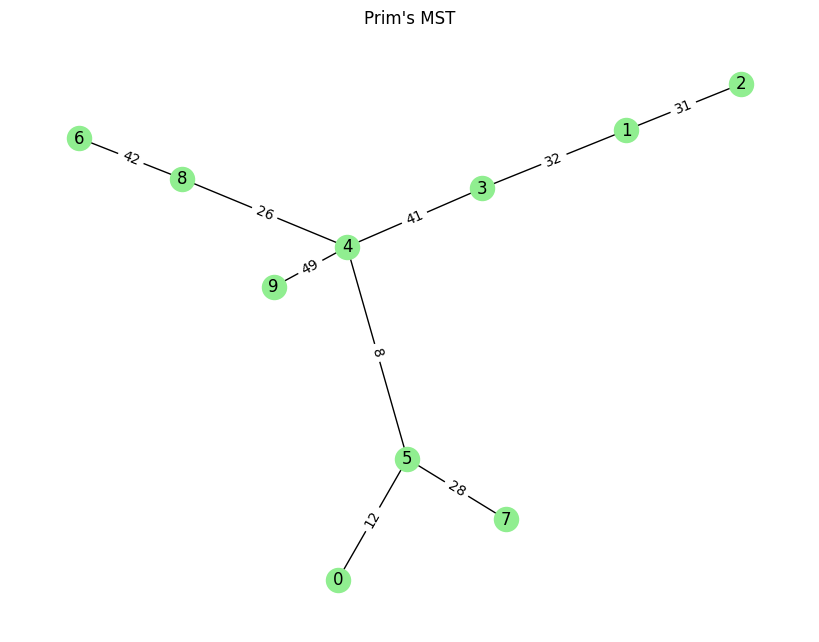

In [15]:
import networkx as nx

def draw_graph(adj_matrix, title):
    G = nx.Graph()
    for i in range(len(adj_matrix)):
        for j in range(i+1, len(adj_matrix)):
            if adj_matrix[i][j] > 0:
                G.add_edge(i, j, weight=adj_matrix[i][j])

    pos = nx.spring_layout(G)
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title(title)
    plt.show()

def draw_mst(mst_edges, title):
    G = nx.Graph()
    for u, v, w in mst_edges:
        G.add_edge(u, v, weight=w)

    pos = nx.spring_layout(G)
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightgreen')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title(title)
    plt.show()

# Visualize
draw_graph(adj_matrix, "Original Graph")
draw_mst(kruskal_mst, "Kruskal's MST")
draw_mst(prim_mst, "Prim's MST")

Infografis Performa

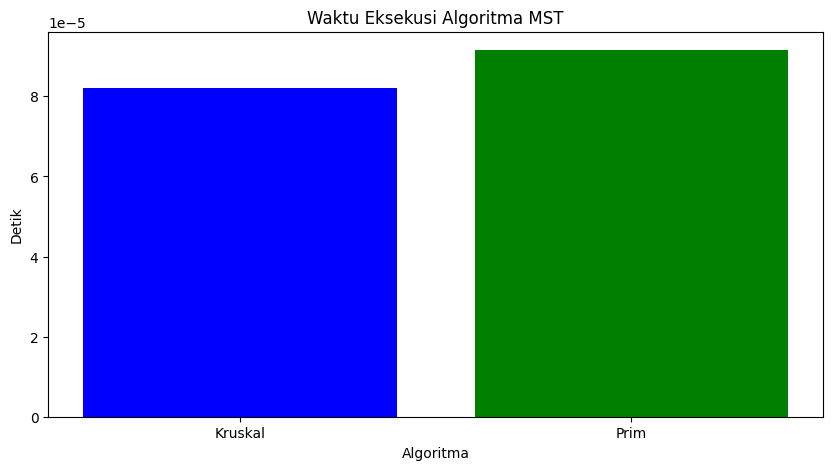

In [16]:
# Performance comparison plot
plt.figure(figsize=(10, 5))
plt.bar(results_df['Algorithm'], results_df['Time (s)'], color=['blue', 'green'])
plt.title('Waktu Eksekusi Algoritma MST')
plt.ylabel('Detik')
plt.xlabel('Algoritma')
plt.show()

Kesimpulan :
1. Kruskal lebih baik untuk graf sparse karena kompleksitasnya bergantung pada jumlah edge (O(E log E))

2. Prim lebih efisien untuk graf dense dengan kompleksitas O(E log V)

3. Kedua algoritma menghasilkan MST dengan total weight yang sama

4. Pemilihan algoritma tergantung pada karakteristik graf dan kebutuhan implementasi